## Load the Libraries

In [1]:
import os
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz

## Question 1

### Load the dataset - regression_part1.csv

In [2]:
dataset = pd.read_csv('./data/regression_part1.csv')
dataset

,revision_time,exam_score
0,2.723,27.682
1,2.844,22.998
2,3.303,19.765
3,3.588,24.481
4,4.050,22.974
5,4.080,27.086
6,5.674,26.136
7,6.060,27.038
8,6.347,31.283
9,6.819,14.731


### a) (3 points) Describe the main properties of the data, focusing on the size, data ranges, and data types

In [3]:
## Data size
dataset.shape

(50, 2)

In [4]:
## Data range
dataset.describe()

,revision_time,exam_score
count,50.000000,50.000000
mean,22.220020,49.919860
std,13.986112,20.925594
min,2.723000,14.731000
25%,8.570500,32.125000
50%,21.688000,47.830500
75%,32.257500,65.069750
max,48.011000,94.945000


In [5]:
## Data types
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 2 columns):
revision_time    50 non-null float64
exam_score       50 non-null float64
dtypes: float64(2)
memory usage: 928.0 bytes


### (b) (3 points) Fit a linear model to the data so that we can predict exam_score from revision_time. Report the estimated model parameters w. Describe what the parameters represent for this 1D data. For this part, you should use the sklearn implementation of Linear Regression.
Hint: By default in sklearn fit_intercept = True. Instead, set fit_intercept =
False and pre-pend 1 to each value of xi yourself to create (xi) = [1; xi].

In [6]:
### add one a column of ones into the dataset
dataset = np.concatenate((np.ones((dataset.shape[0], 1)), dataset), axis = 1)

In [7]:
dataset[:5]

array([[ 1.   ,  2.723, 27.682],
       [ 1.   ,  2.844, 22.998],
       [ 1.   ,  3.303, 19.765],
       [ 1.   ,  3.588, 24.481],
       [ 1.   ,  4.05 , 22.974]])

In [8]:
X = dataset[:,:-1]
y = dataset[:,-1]
print(X[:5])
print(y[:5])

[[1.    2.723]
 [1.    2.844]
 [1.    3.303]
 [1.    3.588]
 [1.    4.05 ]]
[27.682 22.998 19.765 24.481 22.974]


In [9]:
### Train the model
regressor = LinearRegression(fit_intercept = False)
regressor.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [10]:
regressor.coef_

array([17.89768026,  1.44114091])

In [11]:
regressor.intercept_

0.0

In [12]:
y_pred_sklearn = regressor.predict(X)
print(y_pred_sklearn[:5])
print(y[:5])

[21.82190694 21.99628499 22.65776867 23.06849383 23.73430093]
[27.682 22.998 19.765 24.481 22.974]


### (c) (3 points) Display the fitted linear model and the input data on the same plot.

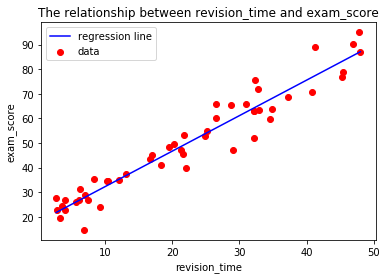

In [13]:
plt.scatter(X[:,1], y, color="red", label="data")
plt.plot(X[:,1], regressor.predict(X), color ="blue", label="regression line")
plt.xlabel("revision_time")
plt.ylabel("exam_score")
plt.title("The relationship between revision_time and exam_score")
plt.legend()

plt.show()

### (d) (3 points) Instead of using sklearn, implement the closed-form solution for fitting a linear regression model yourself using numpy array operations. Report your code in the answer box. It should only take a few lines (i.e. <5).
Hint: Only report the relevant lines for estimating w e.g. we do not need to see the data
loading code. You can write the code in the answer box directly or paste in an image of
it.

In [14]:
X.T

array([[ 1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,
         1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,
         1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,
         1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,
         1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,
         1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,  1.   ,
         1.   ,  1.   ],
       [ 2.723,  2.844,  3.303,  3.588,  4.05 ,  4.08 ,  5.674,  6.06 ,
         6.347,  6.819,  7.098,  7.515,  8.356,  9.214, 10.364, 10.51 ,
        12.102, 13.187, 16.692, 16.977, 18.33 , 19.599, 20.321, 21.28 ,
        21.578, 21.798, 22.048, 24.949, 25.147, 26.495, 26.535, 28.687,
        29.055, 31.043, 32.176, 32.203, 32.226, 32.268, 32.711, 32.886,
        34.489, 34.889, 37.299, 40.875, 41.249, 45.213, 45.397, 46.923,
        47.818, 48.011]])

In [17]:
print(X.shape)
print(np.dot(X.T, X))
w_estimiate = np.linalg.inv(np.dot(X.T, X))
# w_estimiate = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y))
print(w_estimiate)
# y_pred_cf = np.dot(X, w_estimiate)
# y_pred_cf

(50, 2)
[[   50.        1111.001   ]
 [ 1111.001    34271.420147]]
[[ 0.07151086 -0.00231822]
 [-0.00231822  0.00010433]]


### (e) (3 points) Mean Squared Error (MSE) is a common metric used for evaluating the performance of regression models. Write out the expression for MSE and list one of its limitations.
Hint: For notation, you can use y for the ground truth quantity and ^y ($\hat{y}$ in
latex) in place of the model prediction.

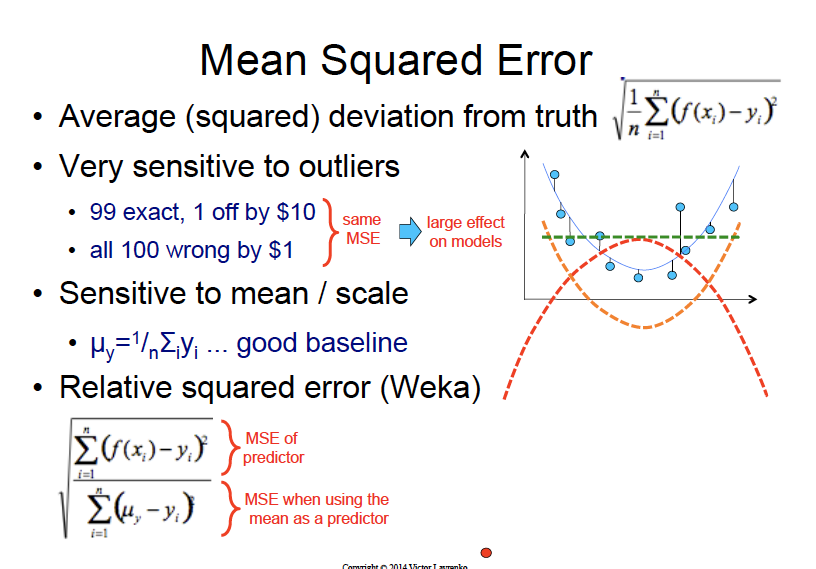

### (f) (3 points) Our next step will be to evaluate the performance of the fitted models using Mean Squared Error (MSE). Report the MSE of the data in regression_part1.csv for your prediction of exam_score. You should report the MSE for the linear model fitted using sklearn and the model resulting from your closed-form solution. Comment on any differences in their performance.

#### sklearn model

In [17]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y, y_pred_sklearn)

30.985472614541294

#### closed form solution

In [18]:
mean_squared_error(y, y_pred_cf)

30.985472614541287

### (g) (4 points) Assume that the optimal value of w0 is 20, it is not but let's assume so for now. Create a plot where you vary w1 from 􀀀2 to +2 on the horizontal axis, and report the Mean Squared Error on the vertical axis for each setting of w = [w0;w1] across the dataset. Describe the resulting plot. Where is its minimum? Is this value to be expected?
Hint: You can try 100 values of w1 i.e. w1 = np.linspace(-2,2, 100).

In [19]:
w1 = np.linspace(-2,2, 100)
w0 = 20
w1[83]

1.3535353535353538

In [20]:
weights = list(map(lambda e: [w0, e], w1))

#### Now plot the graph

In [21]:
y_list = []
for i in range(len(weights)):
    y_pred = np.dot(X, weights[i])
    mse_y = mean_squared_error(y, y_pred)
    y_list.append(mse_y)

In [22]:
min_mse = min(y_list)

w1[y_list.index(min_mse)]

1.3535353535353538

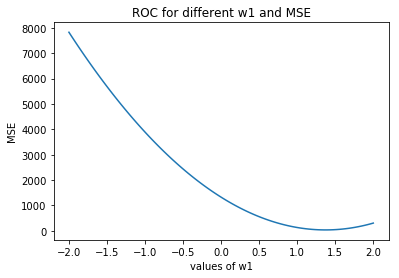

In [22]:
plt.plot(w1, y_list)
plt.xlabel('values of w1')
plt.ylabel('MSE')
plt.title('ROC for different w1 and MSE')
plt.show()

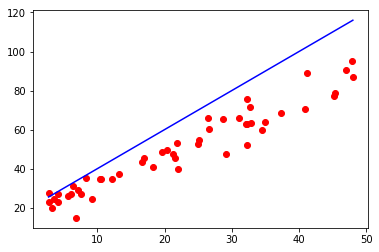

In [27]:
w_test = [20, 2]

y_pred_test = np.dot(X, w_test)


plt.scatter(X[:,1], y, color="red", label="data")
plt.plot(X[:,1], y_pred_test, color ="blue", label="regression line")

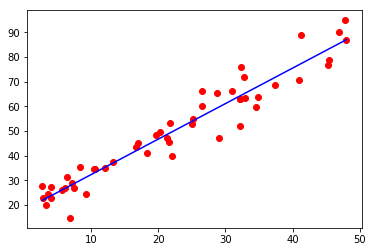

In [24]:
plt.scatter(X[:,1], y, color="red", label="data")
plt.plot(X[:,1], regressor.predict(X), color ="blue", label="regression line")